# ATAC-Seq Read Count

**Created**: 17 January 2022

## Environment

In [1]:
library(tidyverse)

setwd("~/eQTL_pQTL_Characterization/")

source("03_Functional_Interpretation/scripts/utils/ggplot_theme.R")

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load Data

In [2]:
meta <- read.csv("03_Functional_Interpretation/metadata/reads_calderon_et_al_atac_seq.txt")

In [3]:
head(meta)

,Run,Assay.Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Cell_type,Center.Name,Consent,⋯,LibrarySelection,LibrarySource,lineage,Organism,Platform,ReleaseDate,Sample.Name,source_name,SRA.Study,Treatment
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,SRR7650729,ATAC-seq,130,7671684082,PRJNA484801,SAMN09769836,3235449960,Bulk_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320229,primary blood,SRP156496,no_treament
2,SRR7650730,ATAC-seq,130,8755083677,PRJNA484801,SAMN09769835,3691300841,Bulk_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320230,primary blood,SRP156496,treatment1
3,SRR7650731,ATAC-seq,131,8483939942,PRJNA484801,SAMN09769834,3602660374,Mem_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320231,primary blood,SRP156496,no_treament
4,SRR7650732,ATAC-seq,131,7895482240,PRJNA484801,SAMN09769833,3334427072,Mem_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320232,primary blood,SRP156496,treatment1
5,SRR7650733,ATAC-seq,132,7063118195,PRJNA484801,SAMN09769832,3012041722,Naive_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320233,primary blood,SRP156496,no_treament
6,SRR7650734,ATAC-seq,131,9335521479,PRJNA484801,SAMN09769831,3972942953,Naive_B,GEO,public,⋯,other,GENOMIC,B,Homo sapiens,ILLUMINA,2018-09-06T00:00:00Z,GSM3320234,primary blood,SRP156496,treatment1


In [4]:
colnames(meta)

[1] "Run"                 "Assay.Type"          "AvgSpotLen"         
 [4] "Bases"               "BioProject"          "BioSample"          
 [7] "Bytes"               "Cell_type"           "Center.Name"        
[10] "Consent"             "DATASTORE.filetype"  "DATASTORE.provider" 
[13] "DATASTORE.region"    "Donor"               "Experiment"         
[16] "GEO_Accession..exp." "Instrument"          "LibraryLayout"      
[19] "LibrarySelection"    "LibrarySource"       "lineage"            
[22] "Organism"            "Platform"            "ReleaseDate"        
[25] "Sample.Name"         "source_name"         "SRA.Study"          
[28] "Treatment"

## Basic Information about Data

There are 175 ATAC-Seq samples from the Calderon *et al.* study.

In [5]:
nrow(meta)

[1] 175

Most samples were run on an Illumina HiSeq 4000. Some were run on an Illumina NovaSeq 6000. All samples runs generated paired-end 76 bp reads.

In [6]:
table(meta$Instrument)
table(meta$LibraryLayout)
table(meta$LibrarySelection)
table(meta$LibrarySource)
table(meta$Platform)


  Illumina HiSeq 4000 Illumina NovaSeq 6000 
                  159                    16 


PAIRED 
   175 


other 
  175 


GENOMIC 
    175 


ILLUMINA 
     175 

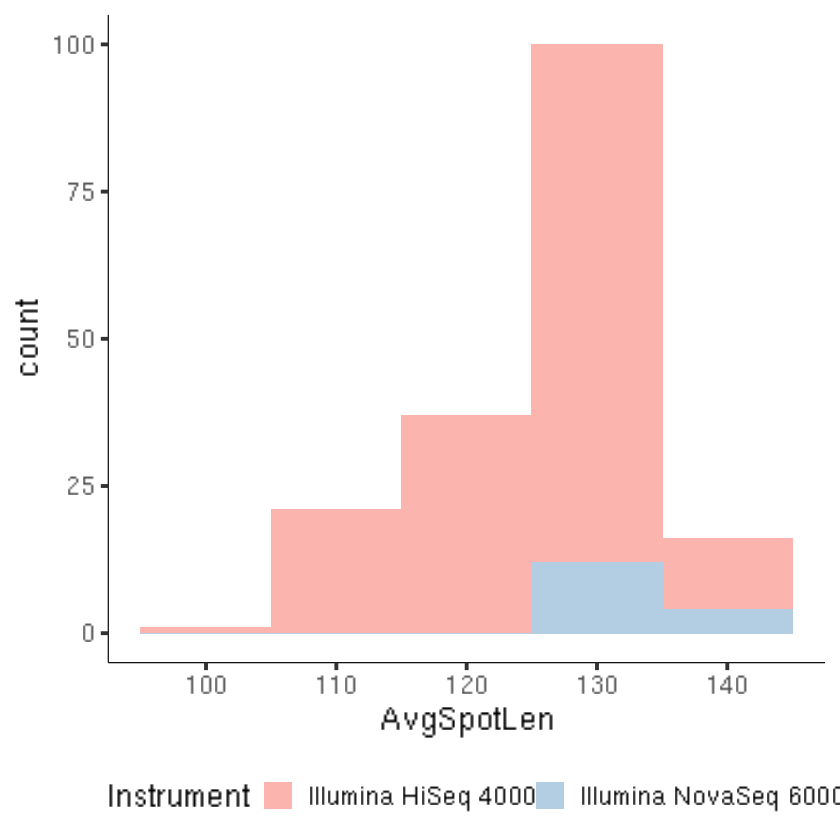

In [7]:
meta %>%
    ggplot() +
    geom_histogram(aes(x=AvgSpotLen, fill=Instrument), binwidth=10) +
    scale_fill_brewer(palette="Pastel1") +
    ggplot_theme

There are 25 different primary cell types.

In [10]:
length(unique(meta$Cell_type))
table(meta$Cell_type)

[1] 25


                  Bulk_B                 CD8pos_T  Central_memory_CD8pos_T 
                       7                        7                        8 
       Effector_CD4pos_T Effector_memory_CD8pos_T      Follicular_T_Helper 
                       7                        8                        9 
           Gamma_delta_T              Immature_NK                Mature_NK 
                       7                        5                       10 
                   Mem_B                Memory_NK             Memory_Teffs 
                       8                        6                        8 
            Memory_Tregs                Monocytes              Myeloid_DCs 
                       8                        9                        3 
                 Naive_B              Naive_CD8_T              Naive_Teffs 
                       7                        8                        9 
             Naive_Tregs                     pDCs             Plasmablasts 
           

These 25 cell types belong to 6 broad cell lineages. Most samples come from CD4 T cells, followed by CD8 T Cells.

In [11]:
length(unique(meta$lineage))
table(meta$lineage)

[1] 6


      B     CD4     CD8      GD MYELOID      NK 
     25      76      31       7      15      21 

In [17]:
meta %>%
    dplyr::select(Cell_type, lineage) %>%
    unique()

,Cell_type,lineage
,<chr>,<chr>
1,Bulk_B,B
3,Mem_B,B
5,Naive_B,B
7,Plasmablasts,B
8,CD8pos_T,CD8
10,Central_memory_CD8pos_T,CD8
12,Effector_memory_CD8pos_T,CD8
14,Naive_CD8_T,CD8
16,Gamma_delta_T,GD


Samples were either unstimulated (`no_treament`) or stimulated (`treatment1` or `treatment2`). More than one treatment was used for Mature NK cells, Monocytes, Naive Effector T Cells, and Naive Regulatory T Cells.

In [13]:
table(meta$Treatment)
table(meta$Cell_type, meta$Treatment)


no_treament  treatment1  treatment2 
         97          71           7 

                          
                           no_treament treatment1 treatment2
  Bulk_B                             4          3          0
  CD8pos_T                           4          3          0
  Central_memory_CD8pos_T            4          4          0
  Effector_CD4pos_T                  4          3          0
  Effector_memory_CD8pos_T           4          4          0
  Follicular_T_Helper                5          4          0
  Gamma_delta_T                      4          3          0
  Immature_NK                        5          0          0
  Mature_NK                          4          4          2
  Mem_B                              4          3          1
  Memory_NK                          6          0          0
  Memory_Teffs                       4          4          0
  Memory_Tregs                       4          4          0
  Monocytes                          3          4          2
  Myeloid_DCs                        3          0         

The samples were generated from 7 donors. 4 of the donors contributed to a large number of samples.

In [15]:
length(unique(meta$Donor))
table(meta$Donor)

[1] 7


1001 1002 1003 1004 1008 1010 1011 
  42   41   39   37    8    7    1 